# Linear Regression with Gradient Descent Using NumPy

This script performs linear regression using gradient descent to predict house prices based on various features from a dataset. The steps include:

1. **Load and preprocess the data**: Load the dataset from a CSV file and split it into features and target variables.
2. **Split the data**: Divide the data into training (75%) and testing (25%) sets.
3. **Train the linear regression model**: Use gradient descent to optimize the weights and bias.
4. **Evaluate the model**: Calculate the Mean Squared Error (MSE) on the test set.
5. **Visualize the results**: Plot the predicted vs. actual house prices and connect the corresponding points.

Mean Squared Error: 44.19519764464969


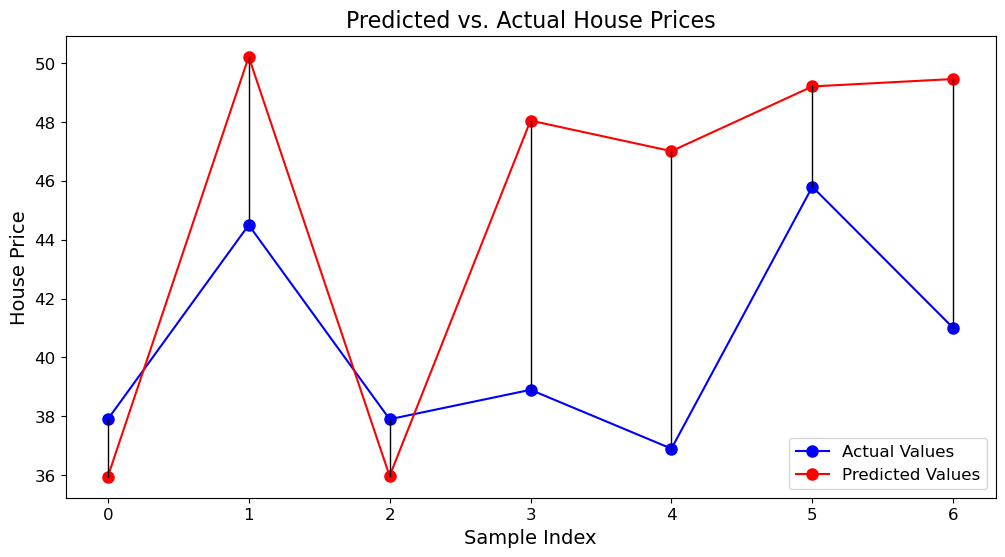

In [29]:

import numpy as np
import matplotlib.pyplot as plt

# Load the data from the text file
file_path = 'prices.txt'
data = np.loadtxt(file_path, delimiter=',')

# Split the data into features (X) and target (y)
# The last column is assumed to be the target variable
X = data[:, :-1]
y = data[:, -1]

# Split the data into 75% train and 25% test
train_size = int(0.75 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize parameters
m, n = X_train.shape
w = np.zeros(n)  # Weights
b = 0  # Bias

# Set hyperparameters
learning_rate = 0.000001
num_iterations = 100000

# Gradient descent function
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        dw = np.zeros(n)  # Initialize gradient for weights
        db = 0  # Initialize gradient for bias
        for i in range(m):
            xi = X[i]
            yi = y[i]
            prediction = np.dot(w, xi) + b
            error = prediction - yi
            for j in range(n):
                dw[j] += (1/m) * error * xi[j]  # Accumulate gradient
            db += (1/m) * error  # Accumulate gradient
        w -= learning_rate * dw  # Update weights
        b -= learning_rate * db  # Update bias
    return w, b

# Train the model using gradient descent
w, b = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)

# Make predictions on the test set
y_pred = np.dot(X_test, w) + b

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# Print Mean Squared Error
print(f'Mean Squared Error: {mse}')

# Plot predictions vs. actual values and connect the corresponding points
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, 'bo-', label='Actual Values', markersize=8)  # Blue dots for actual values
plt.plot(range(len(y_test)), y_pred, 'ro-', label='Predicted Values', markersize=8)  # Red dots for predicted values
for i in range(len(y_test)):
    plt.plot([i, i], [y_test[i], y_pred[i]], 'k-', linewidth=1)  # Black lines to connect points
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.title('Predicted vs. Actual House Prices', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
